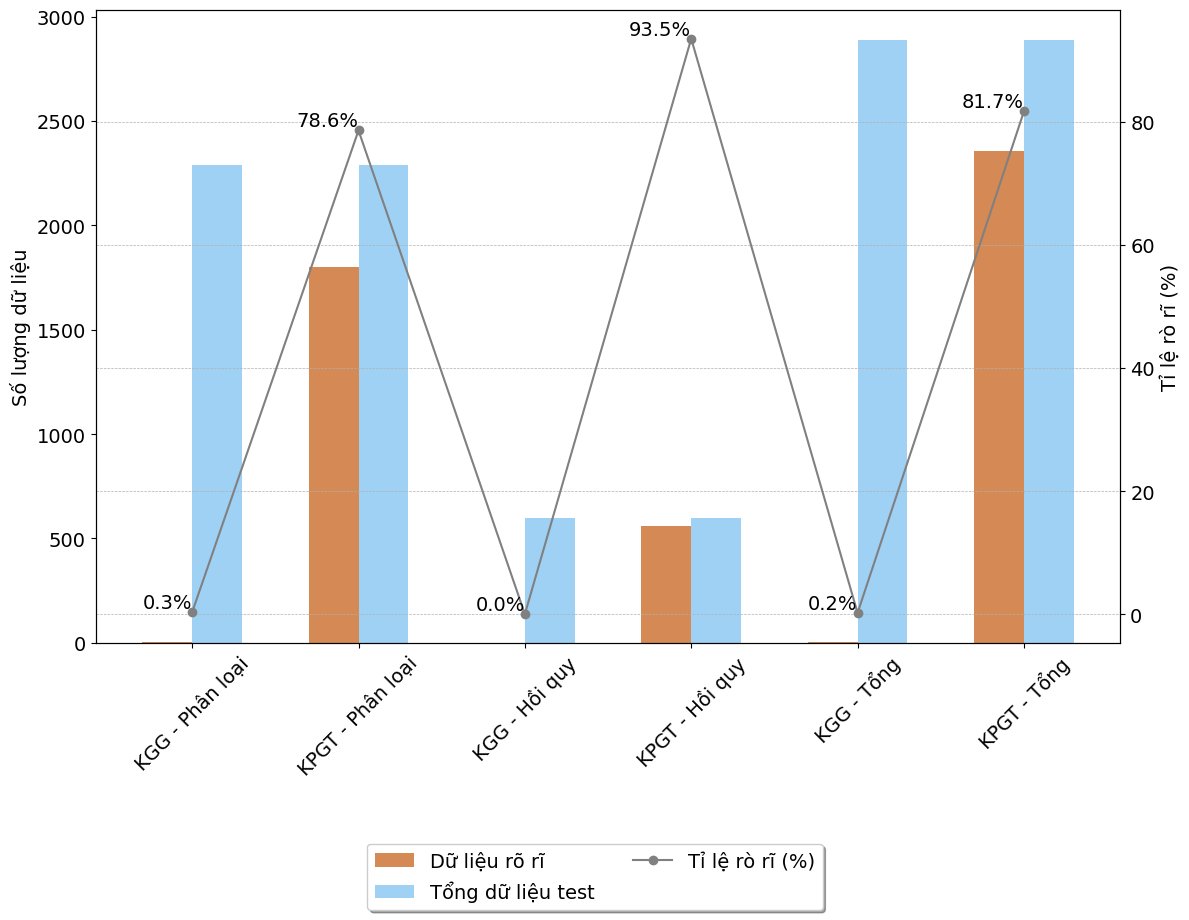

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Mô hình': ['KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT'],
    'Bộ dữ liệu': ['Phân loại', 'Phân loại', 'Hồi quy', 'Hồi quy', 'Tổng', 'Tổng'],
    'Dữ liệu rõ rĩ': [6, 1799, 0, 559, 6, 2358],
    'Tổng dữ liệu test': [2289, 2289, 598, 598, 2887, 2887],
    'Tỉ lệ rò rĩ (%)': [0.3, 78.6, 0.0, 93.5, 0.2, 81.7]
}

df = pd.DataFrame(data)

# Filter data for "Phân loại" and "Hồi quy"
# df_classification_regression = df[df['Bộ dữ liệu'].isin(['Phân loại', 'Hồi quy'])]

# Filter data for "Tổng"
df_total = df[df['Bộ dữ liệu'] == 'Tổng']

# Function to plot the bar and line chart
def plot_bar_line(df, name):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    bar_width = 0.3
    index = np.arange(len(df))
    
    bar1 = ax.bar(index - bar_width / 2, df['Dữ liệu rõ rĩ'], bar_width, label='Dữ liệu rõ rĩ', color='#D58A55')
    bar2 = ax.bar(index + bar_width / 2, df['Tổng dữ liệu test'], bar_width, label='Tổng dữ liệu test', color='#9FD1F5')
    
    ax2 = ax.twinx()
    line = ax2.plot(index, df['Tỉ lệ rò rĩ (%)'], color='gray', marker='o', label='Tỉ lệ rò rĩ (%)')
    
    ax.set_ylabel('Số lượng dữ liệu', fontsize=14)
    ax2.set_ylabel('Tỉ lệ rò rĩ (%)', fontsize=14)
    ax.set_xticks(index)
    ax.set_xticklabels(df['Mô hình'] + " - " + df['Bộ dữ liệu'], rotation=45, fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)
    
    bars = bar1 + bar2
    bar_labels = ['Dữ liệu rõ rĩ', 'Tổng dữ liệu test']
    
    # Adding text labels for Tỉ lệ rò rĩ (%)
    for i, txt in enumerate(df['Tỉ lệ rò rĩ (%)']):
        ax2.text(i, txt, f'{txt:.1f}%', color='black', ha='right', va='bottom', fontsize=14)  # Move labels above the points
    
    # Move legend to the bottom
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2, fontsize=14)
    
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(f'fig/{name}.png', dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Plotting for "Phân loại" and "Hồi quy"
plot_bar_line(df, name="ClassRegress_Ablation")

# Plotting for "Tổng"
# plot_bar_line(df_total, name='TotalAblation')


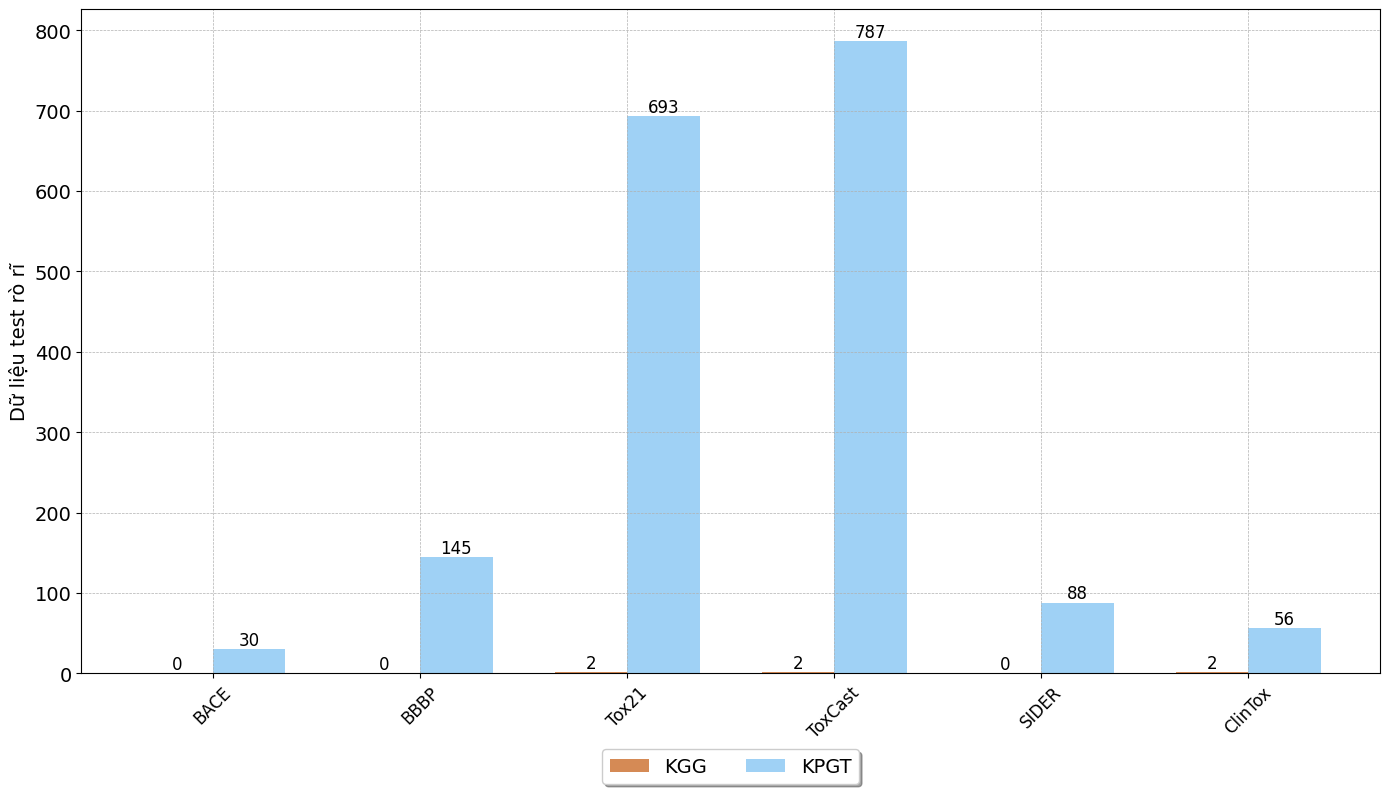

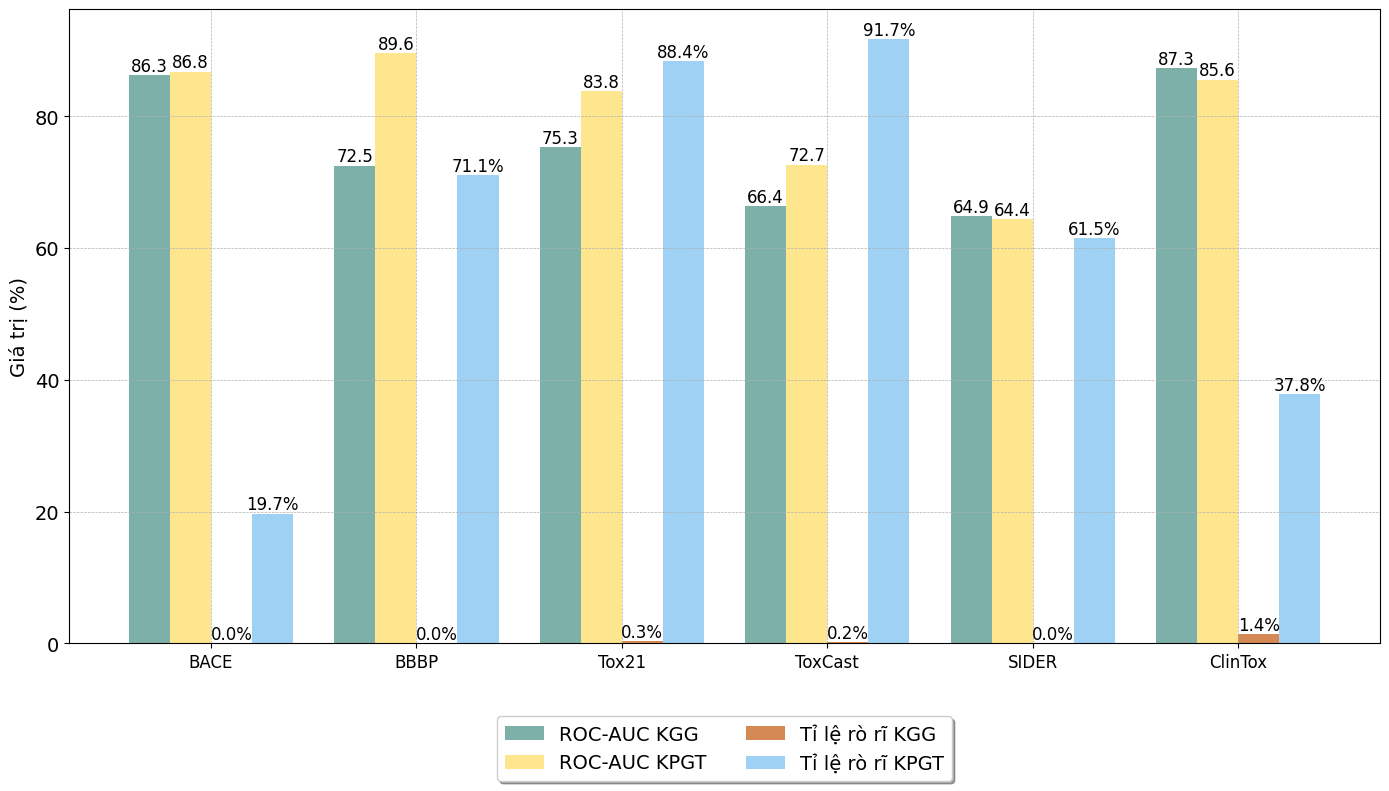

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Mô hình': ['KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT'],
    'Bộ dữ liệu': ['BACE', 'BACE', 'BBBP', 'BBBP', 'Tox21', 'Tox21', 'ToxCast', 'ToxCast', 'SIDER', 'SIDER', 'ClinTox', 'ClinTox'],
    'ROC-AUC (%)': [86.32, 86.80, 72.53, 89.60, 75.33, 83.80, 66.44, 72.70, 64.9, 64.40, 87.31, 85.60],
    'Dữ liệu test rò rĩ': [0, 30, 0, 145, 2, 693, 2, 787, 0, 88, 2, 56],
    'Tỉ lệ rò rĩ (%)': [0.0, 19.7, 0.0, 71.1, 0.3, 88.4, 0.2, 91.7, 0.0, 61.5, 1.4, 37.8]
}

df = pd.DataFrame(data)

# Function to plot the bar chart for Dữ liệu test rò rĩ
def plot_leakage_chart(df):
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.35
    index = np.arange(len(df) // 2)
    
    bar1 = ax.bar(index - bar_width / 2, df[df['Mô hình'] == 'KGG']['Dữ liệu test rò rĩ'], bar_width, label='KGG', color='#D58A55')
    bar2 = ax.bar(index + bar_width / 2, df[df['Mô hình'] == 'KPGT']['Dữ liệu test rò rĩ'], bar_width, label='KPGT', color='#9FD1F5')
    
    ax.set_ylabel('Dữ liệu test rò rĩ', fontsize=14)
    ax.set_xticks(index)
    ax.set_xticklabels(df['Bộ dữ liệu'].unique(), rotation=45, fontsize=12)
    ax.tick_params(axis='y', labelsize=14)
    
    # Adding text labels for Dữ liệu test rò rĩ
    for i, (val_kgg, val_kpgt) in enumerate(zip(df[df['Mô hình'] == 'KGG']['Dữ liệu test rò rĩ'], df[df['Mô hình'] == 'KPGT']['Dữ liệu test rò rĩ'])):
        ax.text(i - bar_width / 2, val_kgg, f'{val_kgg}', color='black', ha='center', va='bottom', fontsize=12)
        ax.text(i + bar_width / 2, val_kpgt, f'{val_kpgt}', color='black', ha='center', va='bottom', fontsize=12)
    
    # Move legend to the bottom
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2, fontsize=14)
    
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('fig/LeakageClass.png', dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Function to plot the bar chart for ROC-AUC and Tỉ lệ rò rĩ
def plot_comparison_chart(df):
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.2
    index = np.arange(len(df) // 2)
    
    bar1 = ax.bar(index - bar_width * 1.5, df[df['Mô hình'] == 'KGG']['ROC-AUC (%)'], bar_width, label='ROC-AUC KGG', color="#7DB0A8")
    bar2 = ax.bar(index - bar_width / 2, df[df['Mô hình'] == 'KPGT']['ROC-AUC (%)'], bar_width, label='ROC-AUC KPGT', color="#FEE68E")
    bar3 = ax.bar(index + bar_width / 2, df[df['Mô hình'] == 'KGG']['Tỉ lệ rò rĩ (%)'], bar_width, label='Tỉ lệ rò rĩ KGG', color='#D58A55')
    bar4 = ax.bar(index + bar_width * 1.5, df[df['Mô hình'] == 'KPGT']['Tỉ lệ rò rĩ (%)'], bar_width, label='Tỉ lệ rò rĩ KPGT', color='#9FD1F5')
    
    ax.set_ylabel('Giá trị (%)', fontsize=14)
    ax.set_xticks(index)
    ax.set_xticklabels(df['Bộ dữ liệu'].unique(), rotation=0, fontsize=12)
    ax.tick_params(axis='y', labelsize=14)
    
    # Adding text labels for ROC-AUC (%) and Tỉ lệ rò rĩ (%)
    for i, (roc_kgg, roc_kpgt, leak_kgg, leak_kpgt) in enumerate(zip(df[df['Mô hình'] == 'KGG']['ROC-AUC (%)'], df[df['Mô hình'] == 'KPGT']['ROC-AUC (%)'], df[df['Mô hình'] == 'KGG']['Tỉ lệ rò rĩ (%)'], df[df['Mô hình'] == 'KPGT']['Tỉ lệ rò rĩ (%)'])):
        ax.text(i - bar_width * 1.5, roc_kgg, f'{roc_kgg:.1f}', color='black', ha='center', va='bottom', fontsize=12)
        ax.text(i - bar_width / 2, roc_kpgt, f'{roc_kpgt:.1f}', color='black', ha='center', va='bottom', fontsize=12)
        ax.text(i + bar_width / 2, leak_kgg, f'{leak_kgg:.1f}%', color='black', ha='center', va='bottom', fontsize=12)
        ax.text(i + bar_width * 1.5, leak_kpgt, f'{leak_kpgt:.1f}%', color='black', ha='center', va='bottom', fontsize=12)
    
    # Move legend to the bottom
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2, fontsize=14)
    
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('fig/ComparisonClass.png', dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Plotting the bar chart for Dữ liệu test rò rĩ
plot_leakage_chart(df)

# Plotting the bar chart for ROC-AUC and Tỉ lệ rò rĩ
plot_comparison_chart(df)


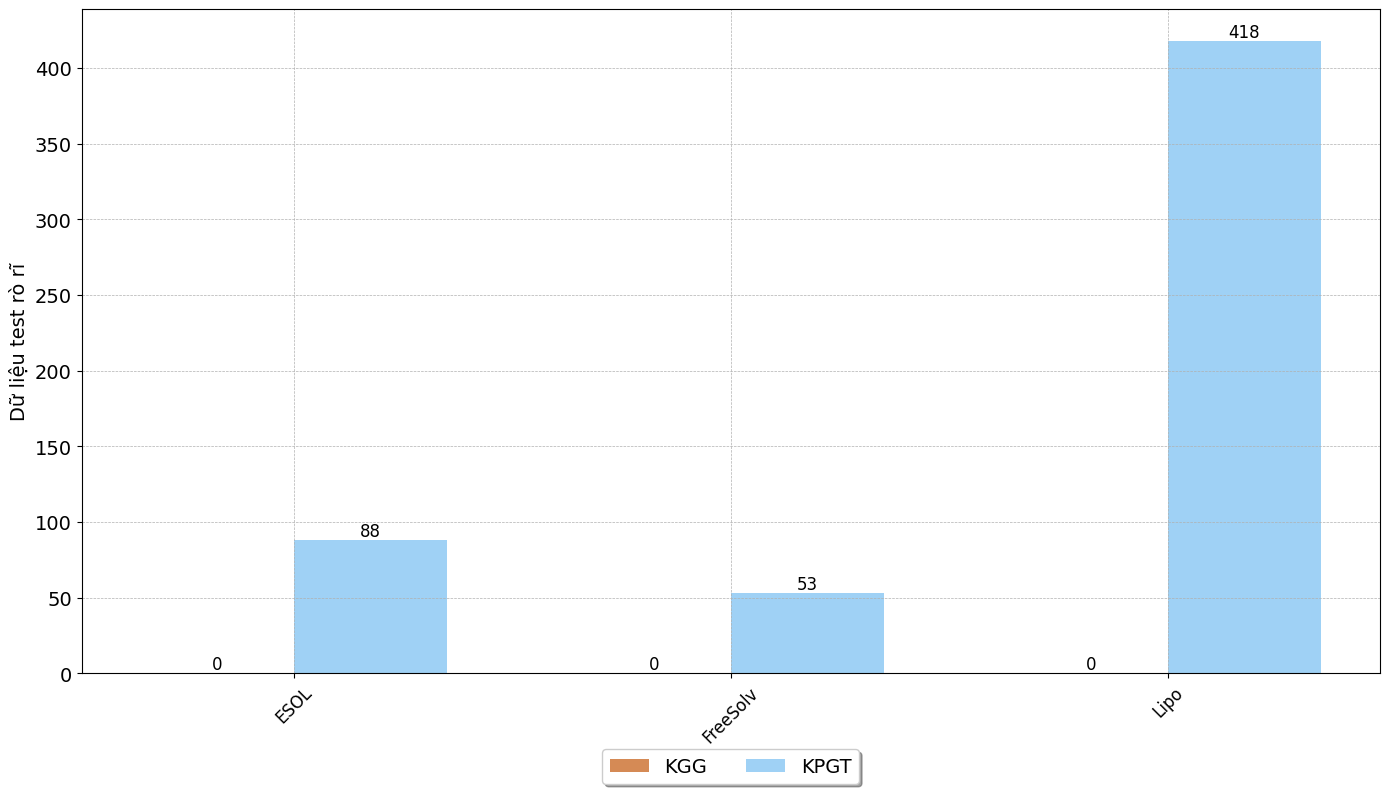

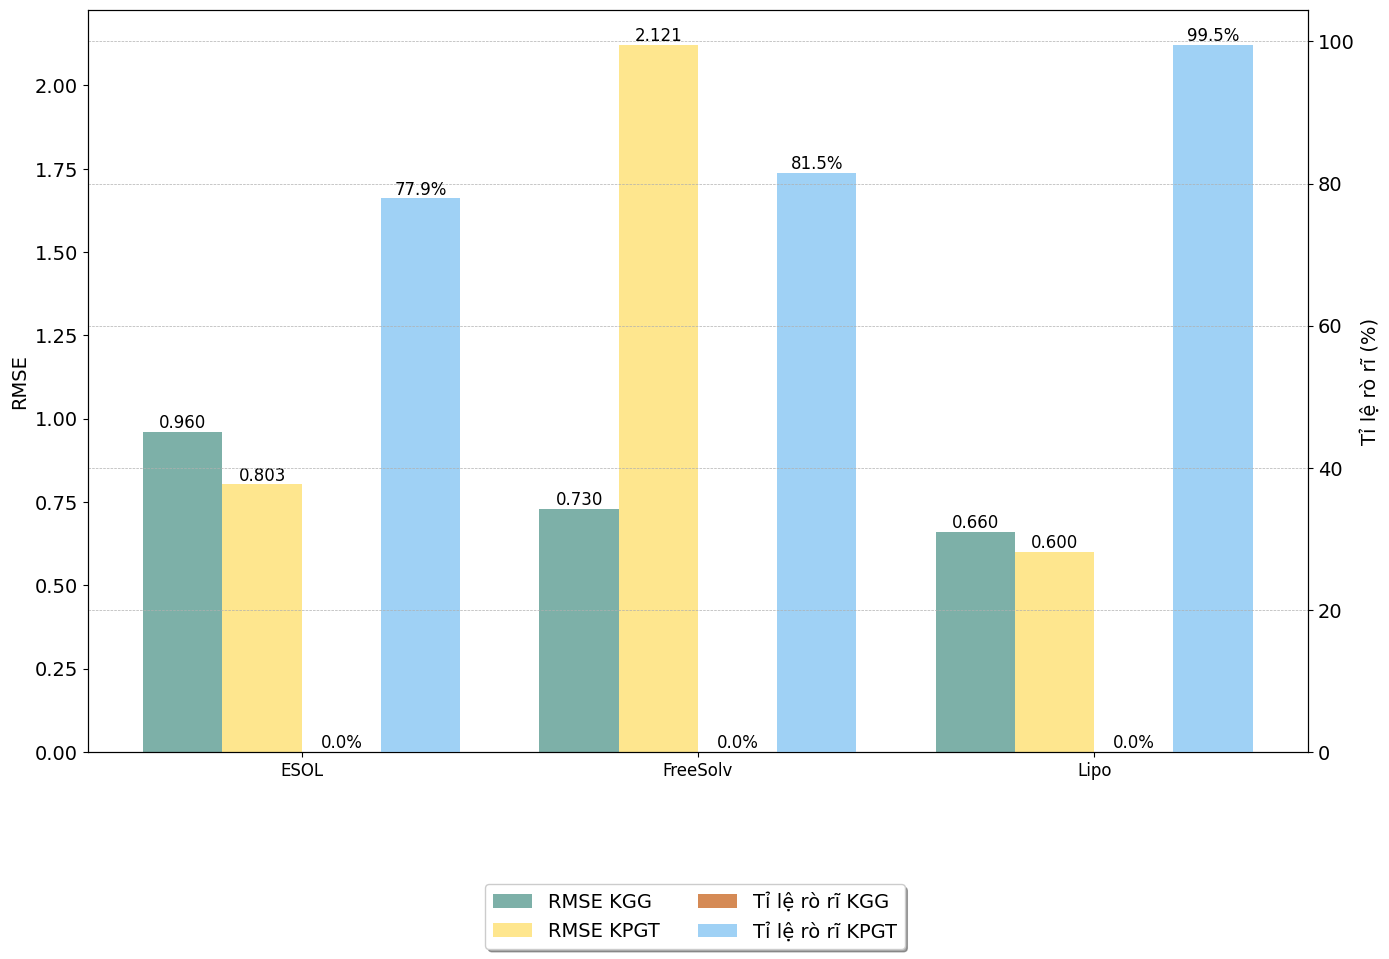

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for regression models
data_regression = {
    'Mô hình': ['KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT'],
    'Bộ dữ liệu': ['ESOL', 'ESOL', 'FreeSolv', 'FreeSolv', 'Lipo', 'Lipo'],
    'RMSE': [0.960, 0.803, 0.730, 2.121, 0.660, 0.600],
    'Dữ liệu test rò rĩ': [0, 88, 0, 53, 0, 418],
    'Số chất tập test': [113, 113, 65, 65, 420, 420],
    'Tỉ lệ rò rĩ (%)': [0.0, 77.9, 0.0, 81.5, 0.0, 99.5]
}

df_regression = pd.DataFrame(data_regression)

# Scale RMSE/MAE values for better visualization (maximum is 3)

# Create the directory for saving figures
import os
os.makedirs('fig', exist_ok=True)

# Function to plot the bar chart for Dữ liệu test rò rĩ
def plot_leakage_chart_regression(df):
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.35
    index = np.arange(len(df) // 2)
    
    bar1 = ax.bar(index - bar_width / 2, df[df['Mô hình'] == 'KGG']['Dữ liệu test rò rĩ'], bar_width, label='KGG', color='#D58A55')
    bar2 = ax.bar(index + bar_width / 2, df[df['Mô hình'] == 'KPGT']['Dữ liệu test rò rĩ'], bar_width, label='KPGT', color='#9FD1F5')
    
    ax.set_ylabel('Dữ liệu test rò rĩ', fontsize=14)
    ax.set_xticks(index)
    ax.set_xticklabels(df['Bộ dữ liệu'].unique(), rotation=45, fontsize=12)
    ax.tick_params(axis='y', labelsize=14)
    
    # Adding text labels for Dữ liệu test rò rĩ
    for i, (val_kgg, val_kpgt) in enumerate(zip(df[df['Mô hình'] == 'KGG']['Dữ liệu test rò rĩ'], df[df['Mô hình'] == 'KPGT']['Dữ liệu test rò rĩ'])):
        ax.text(i - bar_width / 2, val_kgg, f'{val_kgg}', color='black', ha='center', va='bottom', fontsize=12)
        ax.text(i + bar_width / 2, val_kpgt, f'{val_kpgt}', color='black', ha='center', va='bottom', fontsize=12)
    
    # Move legend to the bottom
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2, fontsize=14)
    
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('fig/LeakageRegression.png', dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Function to plot the bar chart for RMSE/MAE and Tỉ lệ rò rĩ with dual y-axis and separated columns
def plot_comparison_chart_regression(df):
    fig, ax1 = plt.subplots(figsize=(14, 8))
    bar_width = 0.2
    index = np.arange(len(df) // 2)
    
    # Bars for RMSE/MAE
    bar1 = ax1.bar(index - bar_width * 1.5, df[df['Mô hình'] == 'KGG']['RMSE'], bar_width, label='RMSE KGG', color='#7DB0A8')
    bar2 = ax1.bar(index - bar_width / 2, df[df['Mô hình'] == 'KPGT']['RMSE'], bar_width, label='RMSE KPGT', color='#FEE68E')
    ax1.set_ylabel('RMSE', fontsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    
    # Adding text labels for RMSE/MAE
    for i, (rmse_kgg, rmse_kpgt) in enumerate(zip(df[df['Mô hình'] == 'KGG']['RMSE'], df[df['Mô hình'] == 'KPGT']['RMSE'])):
        if not np.isnan(rmse_kgg):
            ax1.text(i - bar_width * 1.5, rmse_kgg, f'{df.iloc[i * 2]["RMSE"]:.3f}', color='black', ha='center', va='bottom', fontsize=12)
        if not np.isnan(rmse_kpgt):
            ax1.text(i - bar_width / 2, rmse_kpgt, f'{df.iloc[i * 2 + 1]["RMSE"]:.3f}', color='black', ha='center', va='bottom', fontsize=12)
    
    # Secondary y-axis for Tỉ lệ rò rĩ
    ax2 = ax1.twinx()
    bar3 = ax2.bar(index + bar_width / 2, df[df['Mô hình'] == 'KGG']['Tỉ lệ rò rĩ (%)'], bar_width, label='Tỉ lệ rò rĩ KGG', color='#D58A55')
    bar4 = ax2.bar(index + bar_width * 1.5, df[df['Mô hình'] == 'KPGT']['Tỉ lệ rò rĩ (%)'], bar_width, label='Tỉ lệ rò rĩ KPGT', color='#9FD1F5')
    ax2.set_ylabel('Tỉ lệ rò rĩ (%)', fontsize=14)
    ax2.tick_params(axis='y', labelsize=14)
    
    # Adding text labels for Tỉ lệ rò rĩ (%)
    for i, (leak_kgg, leak_kpgt) in enumerate(zip(df[df['Mô hình'] == 'KGG']['Tỉ lệ rò rĩ (%)'], df[df['Mô hình'] == 'KPGT']['Tỉ lệ rò rĩ (%)'])):
        ax2.text(i + bar_width / 2, leak_kgg, f'{leak_kgg:.1f}%', color='black', ha='center', va='bottom', fontsize=12)
        ax2.text(i + bar_width * 1.5, leak_kpgt, f'{leak_kpgt:.1f}%', color='black', ha='center', va='bottom', fontsize=12)
    
    # Move legend to the bottom
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2, fontsize=14)
    
    ax1.set_xticks(index)
    ax1.set_xticklabels(df['Bộ dữ liệu'].unique(), rotation=0, fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('fig/ComparisonRegression.png', dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Plotting the bar chart for Dữ liệu test rò rĩ
plot_leakage_chart_regression(df_regression)

# Plotting the bar chart for RMSE and Tỉ lệ rò rĩ with dual y-axis and separated columns
plot_comparison_chart_regression(df_regression)


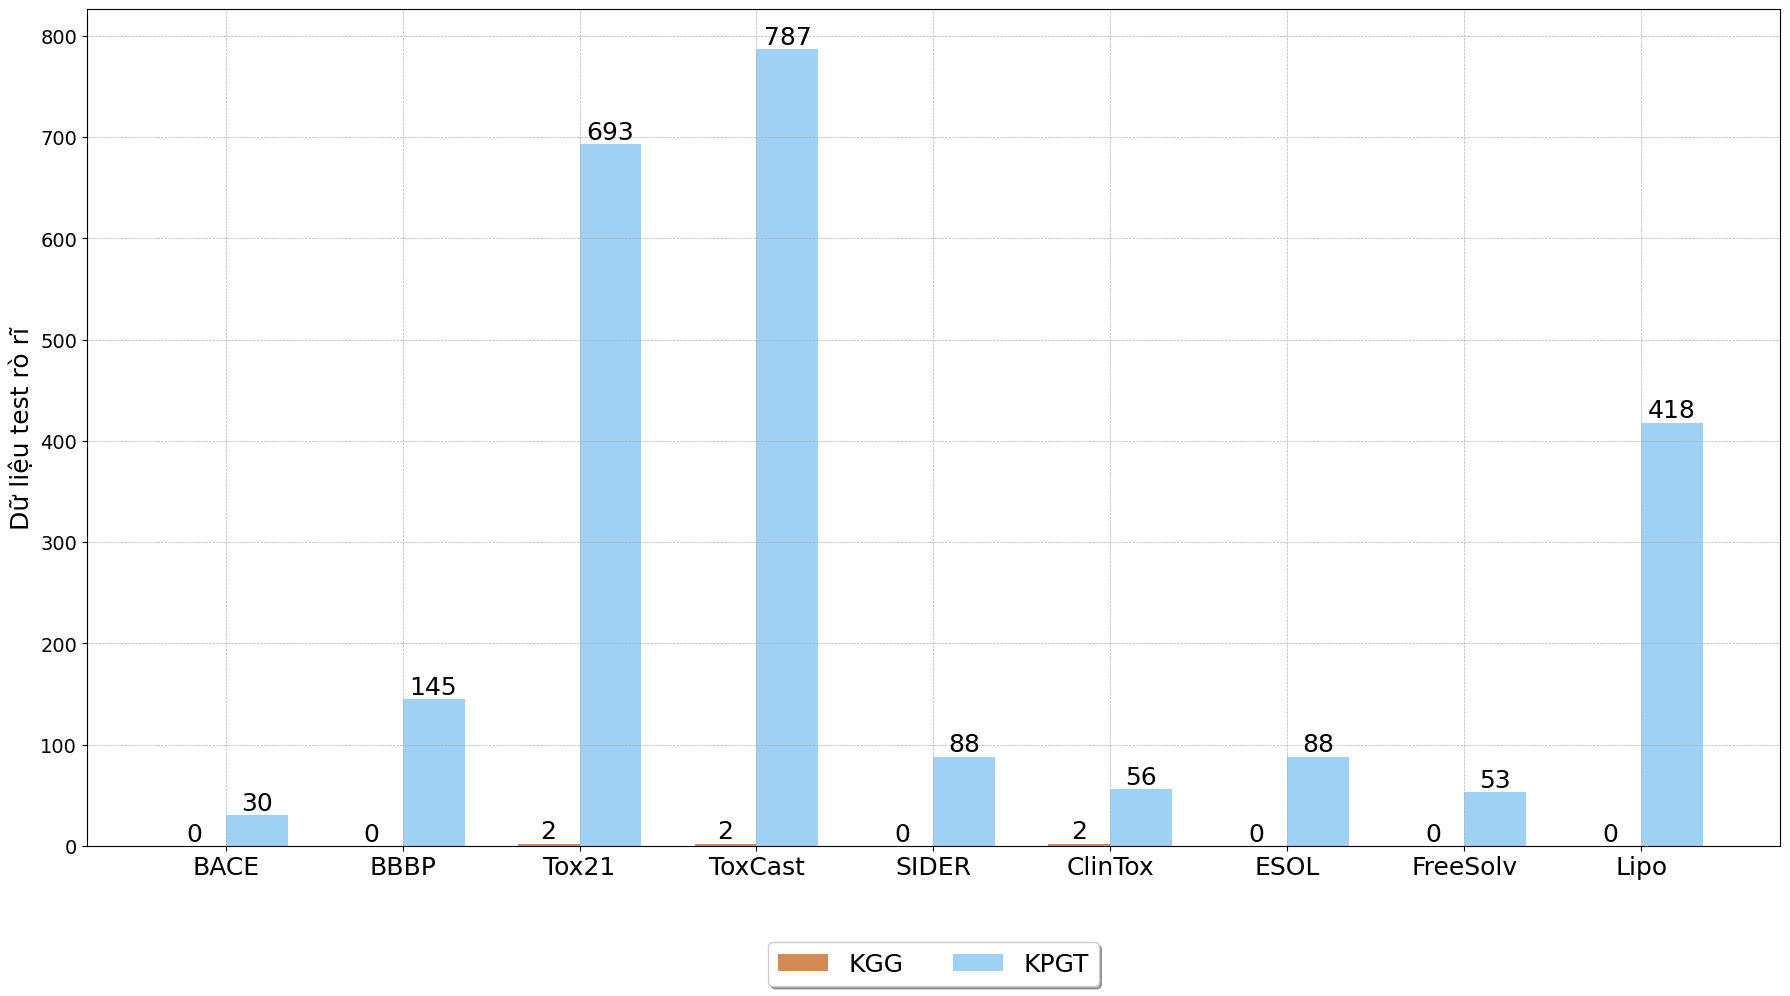

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for both classification and regression models
data_combined = {
    'Mô hình': ['KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT',
                'KGG', 'KPGT', 'KGG', 'KPGT', 'KGG', 'KPGT'],
    'Bộ dữ liệu': ['BACE', 'BACE', 'BBBP', 'BBBP', 'Tox21', 'Tox21', 'ToxCast', 'ToxCast', 'SIDER', 'SIDER', 
                   'ClinTox', 'ClinTox', 'ESOL', 'ESOL', 'FreeSolv', 'FreeSolv', 'Lipo', 'Lipo'],
    'Dữ liệu test rò rĩ': [0, 30, 0, 145, 2, 693, 2, 787, 0, 88, 2, 56, 0, 88, 0, 53, 0, 418]
}

df_combined = pd.DataFrame(data_combined)

# Function to plot the bar chart for all datasets in one figure
def plot_leakage_all_datasets(df):
    fig, ax = plt.subplots(figsize=(18, 10))
    bar_width = 0.35
    index = np.arange(len(df) // 2)
    
    # Bars for Dữ liệu test rò rĩ
    bar1 = ax.bar(index - bar_width / 2, df[df['Mô hình'] == 'KGG']['Dữ liệu test rò rĩ'], bar_width, label='KGG', color='#D58A55')
    bar2 = ax.bar(index + bar_width / 2, df[df['Mô hình'] == 'KPGT']['Dữ liệu test rò rĩ'], bar_width, label='KPGT', color='#9FD1F5')
    
    ax.set_ylabel('Dữ liệu test rò rĩ', fontsize=18)
    ax.set_xticks(index)
    ax.set_xticklabels(df['Bộ dữ liệu'].unique(), rotation=0, fontsize=18)
    ax.tick_params(axis='y', labelsize=14)
    
    # Adding text labels for Dữ liệu test rò rĩ
    for i, (val_kgg, val_kpgt) in enumerate(zip(df[df['Mô hình'] == 'KGG']['Dữ liệu test rò rĩ'], df[df['Mô hình'] == 'KPGT']['Dữ liệu test rò rĩ'])):
        ax.text(i - bar_width / 2, val_kgg, f'{val_kgg}', color='black', ha='center', va='bottom', fontsize=18)
        ax.text(i + bar_width / 2, val_kpgt, f'{val_kpgt}', color='black', ha='center', va='bottom', fontsize=18)
    
    # Move legend to the bottom
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2, fontsize=18)
    
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('fig/leakagequantity.png', dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Plotting the combined bar chart for all datasets
plot_leakage_all_datasets(df_combined)
